In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
import os

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()
#columns = inspector.get_columns('measurement')
#[column['name'] for column in columns]
#['id', 'station', 'date', 'prcp', 'tobs']
#columns = inspector.get_columns('station')
#[column['name'] for column in columns]
#['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Inches')

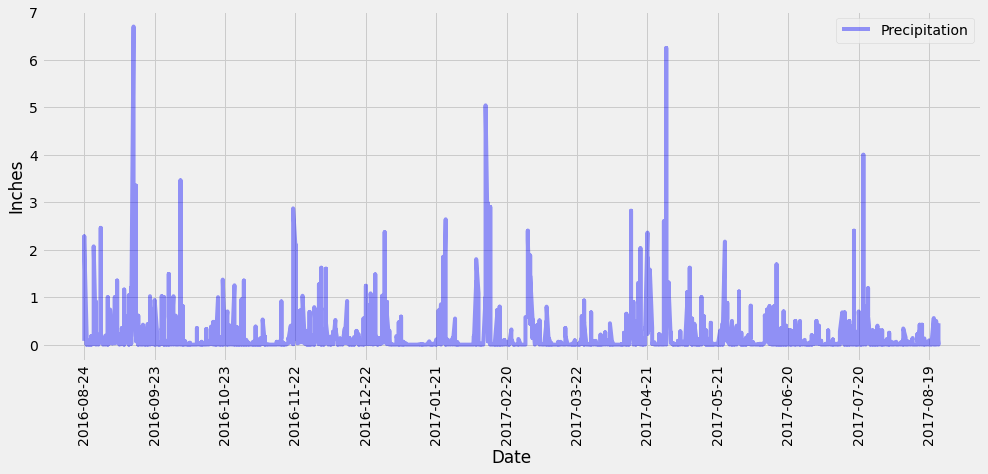

In [94]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

query_2 = session.query(measurement.date, measurement.prcp).filter(measurement.date > '2016-08-23').all()

query_2df = pd.DataFrame(query_2)
query_2df = query_2df.dropna()
query_2df = query_2df.sort_values(by = "date", ascending= True)
#query_2df.head()
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(15,6))
scatter_df2 = plt.plot(query_2df['date'], query_2df['prcp'], c='blue', alpha = .4)

ticks = plt.xticks(np.arange(0, 365, 30), rotation = 'vertical')
plt.legend(['Precipitation'])
plt.xlabel("Date")
plt.ylabel("Inches")


In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data

query_2df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [98]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station.station).count()
print(station_count)

9


In [122]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_active = session.query(station.station, func.count(station.id)).filter(measurement.station==station.station).group_by(station.id).order_by(func.count(station.id).desc()).all()
print(station_active)
#station_active_df = pd.DataFrame(station_active)
#station_active_df.head()
# List the stations and the counts in descending order.


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [132]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_activem = station_active[0][0]
tobs_min = session.query(func.min(measurement.tobs)).filter(measurement.station==station_activem).all()
tobs_max = session.query(func.max(measurement.tobs)).filter(measurement.station==station_activem).all()
tobs_avg = session.query(func.avg(measurement.tobs)).filter(measurement.station==station_activem).all()

print("Temp min:" ,tobs_min,"Temp max:" ,tobs_max, "Temp avg:" ,tobs_avg)

Temp min: [(54.0,)] Temp max: [(85.0,)] Temp avg: [(71.66378066378067,)]


USC00519281


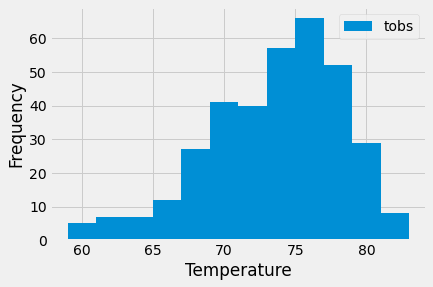

In [192]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
print(station_temp[0][0])

station_temp_2 = session.query(measurement.station, measurement.tobs).filter(measurement.date > '2016-08-23', measurement.station == 'USC00519281').all()
station_temp_2df = pd.DataFrame(station_temp_2)
station_temp_2df.head()
x = station_temp_2df['tobs']
plt.hist(x, histtype='bar', align='mid', orientation='vertical', bins = 12, rwidth=None, log=False, label=None, stacked=False, data=None)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(['tobs'])

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
